In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy as np
import os

In [ ]:
!pip install transformers
!pip install datasets

     |████████████████████████████████| 4.0 MB 12.3 MB/s 
     |████████████████████████████████| 895 kB 31.3 MB/s 
     |████████████████████████████████| 77 kB 3.5 MB/s 
     |████████████████████████████████| 6.5 MB 38.4 MB/s 
     |████████████████████████████████| 596 kB 5.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 325 kB 11.9 MB/s 
     |████████████████████████████████| 136 kB 23.9 MB/s 
     |████████████████████████████████| 212 kB 45.5 MB/s 
     |████████████████████████████████| 1.1 MB 40.7 MB/s 
     |████████████████████████████████| 127 kB 46.1 MB/s 
     |████████████████████████████████| 144 kB 52.8 MB/s 
     |████████████████████████████████| 94 kB 1.8 MB/s 
     |████████████████████████████████| 271 kB 37.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urlli

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IT350/datasets/mqp/mqp.csv',names=['id','question1','question2','label'],header=None)
# df = df.astype({'label':int})
df['label']=pd.to_numeric(df['label'])
del df["id"]
# print(df["label"].dtype)

In [ ]:
df

,question1,question2,label
0,After how many hour from drinking an antibioti...,I have a party tonight and I took my last dose...,1
1,After how many hour from drinking an antibioti...,I vomited this morning and I am not sure if it...,0
2,Am I over weight (192.9) for my age (39)?,I am a 39 y/o male currently weighing about 19...,1
3,Am I over weight (192.9) for my age (39)?,What diet is good for losing weight? Keto or v...,0
4,Aspirin allergy - is it worth getting a bracelet?,How much Aspirin can I take for my headache wi...,0
...,...,...,...
3043,15 million sperm can be a father?,My sperm count is 15 millions and is there a c...,1
3044,26 yo m with history of progressive venous ins...,"Hello doctor, can you please tell me some of t...",0
3045,26 yo m with history of progressive venous ins...,"Hello doctor, I am 26 year old male wth progre...",1
3046,32 weeks pregnant. Headache strange leg weakne...,I am 32 weeks pregnant and had severe headache...,0


In [ ]:
len_of_answers=np.array([])
len_of_questions=np.array([])
df_p = df
for index,row in df.iterrows():
  al = len(row['question2'].split())
  ql = len(row['question1'].split())
  if al > 70 or ql > 70:
    df_p.drop(index, inplace=True)
  len_of_answers=np.append(len_of_answers,al)
  len_of_questions=np.append(len_of_questions,ql)
  
print('questions\nmedian:-',np.median(len_of_questions),'\nmean:-',np.mean(len_of_questions),'\nmin:-',np.min(len_of_questions),'\nmax:-',np.max(len_of_questions))
print('answers\nmedian:-',np.median(len_of_answers),'\nmean:-',np.mean(len_of_answers),'\nmin:-',np.min(len_of_answers),'\nmax:-',np.max(len_of_answers))

questions
median:- 22.0 
mean:- 38.66691071791743 
min:- 3.0 
max:- 139.0
answers
median:- 70.0 
mean:- 100.98202155786048 
min:- 1.0 
max:- 1148.0


In [ ]:
df

,question1,question2,label
1,i have a urine test that tests for nicotine so...,my son has ha several concussion at least 5 fr...,0
2,what are the symptoms of lupus sun sensitivity?,maybe. but some medications for bacterial vagi...,0
3,what's the major difference between cfc and hf...,cost. cfc inhalers run about $5 to $25 apiece ...,1
5,my 9 yr old daughter has been extremely fatigu...,you are most likely experiencing nerve compres...,0
8,after taking antibiotic for pneumonia my son i...,go to a different office. see another optometr...,0
...,...,...,...
24572,our daughter is planning on flying coast to co...,if he is still having sperm he did not have a ...,0
24573,im 44yrs old and if its safe to have another p...,hi sorry but i think your body has been throug...,1
24575,i do not have insurance right now so is there ...,no. shingles is a viral infection (herpes zost...,0
24576,i am on medicare supplement insurance (aarp me...,i would suggest tylenol and mucinex drink lots...,0


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
train.to_csv('/content/drive/MyDrive/IT350/datasets/mqp/train.csv',index=False)
test.to_csv('/content/drive/MyDrive/IT350/datasets/mqp/test.csv',index=False)

In [ ]:
from datasets import load_dataset

In [ ]:
raw_dataset = load_dataset('csv', data_files={'train': '/content/drive/MyDrive/IT350/datasets/mqp/train.csv',
                                              'test': '/content/drive/MyDrive/IT350/datasets/mqp/test.csv'})

Using custom data configuration default-282da162f2788c95


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-282da162f2788c95/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['question1', 'question2', 'label'],
        num_rows: 2438
    })
    test: Dataset({
        features: ['question1', 'question2', 'label'],
        num_rows: 610
    })
})

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["question1"],examples["question2"],max_length=128, padding="max_length",truncation=True)
tokenized_datasets = raw_dataset.map(tokenize_function, batched=True)

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
type(tokenized_datasets['train'])

datasets.arrow_dataset.Dataset

In [ ]:
tokenized_datasets['test'][200]['input_ids'][111]

0

In [ ]:
def extract_features(tokenized_datasets,train_test):
  Y=[]
  X={'input_ids':[],'token_type_ids':[],'attention_mask':[]}
  for i in range(len(tokenized_datasets[train_test])):
    input_ids=tokenized_datasets[train_test][i]['input_ids']
    token_type_ids=tokenized_datasets[train_test][i]['token_type_ids']
    attention_mask=tokenized_datasets[train_test][i]['attention_mask']
    X['input_ids'].append(input_ids)
    X['token_type_ids'].append(token_type_ids)
    X['attention_mask'].append(attention_mask)
    Y.append(tokenized_datasets[train_test][i]['label'])
  X['input_ids']=np.array(X['input_ids'],dtype=np.int32)
  X['token_type_ids']=np.array(X['token_type_ids'],dtype=np.int32)
  X['attention_mask']=np.array(X['attention_mask'],dtype=np.int32)
  Y=np.array(Y,dtype=np.float32)
  return X,Y

In [ ]:
test_data,test_y=extract_features(tokenized_datasets,'test')
train_data,train_y=extract_features(tokenized_datasets,'train')

In [ ]:
import transformers
from transformers import TFBertModel
max_length=128
input_ids = tf.keras.layers.Input(
    shape=(max_length,), dtype=tf.int32, name="input_ids"
)
# Attention masks indicates to the model which tokens should be attended to.
attention_masks = tf.keras.layers.Input(
    shape=(max_length,), dtype=tf.int32, name="attention_masks"
)
# Token type ids are binary masks identifying different sequences in the model.
token_type_ids = tf.keras.layers.Input(
    shape=(max_length,), dtype=tf.int32, name="token_type_ids"
)
# Loading pretrained BERT model.
bert_model = transformers.TFBertModel.from_pretrained("bert-base-uncased")
# Freeze the BERT model to reuse the pretrained features without modifying them.
bert_model.trainable = True

bert_output = bert_model(
    input_ids, attention_mask=attention_masks, token_type_ids=token_type_ids
)
sequence_output = bert_output.last_hidden_state
pooled_output = bert_output.pooler_output
# Add trainable layers on top of frozen layers to adapt the pretrained features on the new data.
bi_lstm = tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(64, return_sequences=True)
)(sequence_output)
# Applying hybrid pooling approach to bi_lstm sequence output.
avg_pool = tf.keras.layers.GlobalAveragePooling1D()(bi_lstm)
max_pool = tf.keras.layers.GlobalMaxPooling1D()(bi_lstm)
concat = tf.keras.layers.concatenate([avg_pool, max_pool])
dropout = tf.keras.layers.Dropout(0.3)(concat)
output = tf.keras.layers.Dense(1, activation="sigmoid")(dropout)
model = tf.keras.models.Model(
    inputs=[input_ids, attention_masks, token_type_ids], outputs=output
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00002),
    loss="binary_crossentropy",
    metrics=["acc"],
)
model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 128)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model_3 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_masks[0][0]',  

In [ ]:
input_data=[train_data['input_ids'],train_data['token_type_ids'],train_data['attention_mask']]
valid_data=[test_data['input_ids'],test_data['token_type_ids'],test_data['attention_mask']]
history=model.fit(input_data,train_y,validation_data=(valid_data,test_y),epochs=10)

Epoch 1/10
243/243 [==============================] - 459s 2s/step - loss: 0.6840 - acc: 0.5574 - val_loss: 0.5246 - val_acc: 0.8301
Epoch 2/10
243/243 [==============================] - 433s 2s/step - loss: 0.3643 - acc: 0.8675 - val_loss: 0.2676 - val_acc: 0.8991
Epoch 3/10
243/243 [==============================] - 432s 2s/step - loss: 0.2393 - acc: 0.9134 - val_loss: 0.2273 - val_acc: 0.9119
Epoch 4/10
243/243 [==============================] - 432s 2s/step - loss: 0.1574 - acc: 0.9476 - val_loss: 0.2437 - val_acc: 0.9022
Epoch 5/10
 47/243 [====>.........................] - ETA: 5:21 - loss: 0.1189 - acc: 0.9668

KeyboardInterrupt: ignored

In [ ]:
input_data=[train_data['input_ids'],train_data['token_type_ids'],train_data['attention_mask']]
valid_data=[test_data['input_ids'],test_data['token_type_ids'],test_data['attention_mask']]
history=model.fit(input_data,train_y,validation_data=(valid_data,test_y),epochs=10)

Epoch 1/10
77/77 [==============================] - 196s 2s/step - loss: 0.9342 - acc: 0.6062 - val_loss: 0.5906 - val_acc: 0.7621
Epoch 2/10
77/77 [==============================] - 159s 2s/step - loss: 0.6695 - acc: 0.6546 - val_loss: 0.5325 - val_acc: 0.7673
Epoch 3/10
77/77 [==============================] - 159s 2s/step - loss: 0.6314 - acc: 0.6665 - val_loss: 0.5099 - val_acc: 0.7693
Epoch 4/10
77/77 [==============================] - 159s 2s/step - loss: 0.6186 - acc: 0.6788 - val_loss: 0.4716 - val_acc: 0.7863
Epoch 5/10
77/77 [==============================] - 159s 2s/step - loss: 0.6005 - acc: 0.6821 - val_loss: 0.4958 - val_acc: 0.7631
Epoch 6/10
77/77 [==============================] - 159s 2s/step - loss: 0.5716 - acc: 0.7092 - val_loss: 0.5082 - val_acc: 0.7518
Epoch 7/10
77/77 [==============================] - 159s 2s/step - loss: 0.5558 - acc: 0.7174 - val_loss: 0.4959 - val_acc: 0.7528
Epoch 8/10
77/77 [==============================] - 159s 2s/step - loss: 0.5378 - a

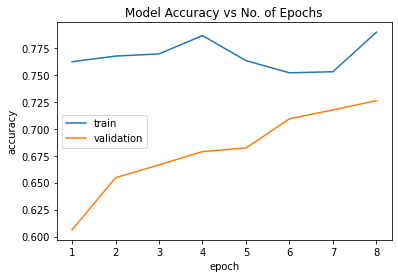

In [ ]:
val_accuracy = [.7621, .7673, .7693, .7863, .7631, .7518, .7528, .7894]
accuracy = [.6062, .6546, .6665, .6788, .6821, .7092, .7174, .7260]
epochs = [1,2,3,4,5,6,7,8]
plt.plot(epochs, val_accuracy)
plt.plot(epochs, accuracy)
plt.title('Model Accuracy vs No. of Epochs')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='center left')
plt.show()

In [ ]:
bert_model.trainable=True
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.000002),
    loss="binary_crossentropy",
    metrics=["acc"],
)

In [ ]:
model.save('/content/drive/MyDrive/IT350/models/BERT_QA_trainable_true/model.h5')

In [ ]:
val_data=[test_data['input_ids'],test_data['token_type_ids'],test_data['attention_mask']]
model.evaluate(val_data,test_y)

154/154 [==============================] - 86s 528ms/step - loss: 0.2082 - acc: 0.9174


[0.20824430882930756, 0.9174293279647827]

In [ ]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/IT350/models/BERT_QA/model.h5',custom_objects={'TFBertModel':TFBertModel})

In [ ]:
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 10, 'steps': 77}
dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


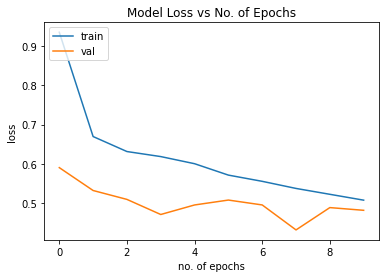

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs No. of Epochs')
plt.ylabel('loss')
plt.xlabel('no. of epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()